## Project: Time Series Analysis on temperature from my birthday until end of 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


# Import the relevant sklearn packages
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [2]:
df= pd.read_csv('TG_STAID002759.csv',sep=',',skiprows=19, parse_dates=True, index_col=1, skipinitialspace=True)
df

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0
...,...,...,...
2022-12-27,111448,42,0
2022-12-28,111448,63,0
2022-12-29,111448,100,0


In [3]:
df = df.drop(['SOUID', 'Q_TG'], axis=1)

In [4]:
df = df.rename(columns={'TG': 'mean_temp'})

In [5]:
df.loc[:] *=0.1

In [6]:
df

,mean_temp
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


In [7]:
# select rows within the date range '1991-07-09' to '2022-12-31'
start_date = '1991-07-09'
end_date = '2022-12-31'
df = df.loc[start_date:end_date]

In [8]:
df

,mean_temp
DATE,
1991-07-09,23.4
1991-07-10,19.6
1991-07-11,24.8
1991-07-12,25.7
1991-07-13,21.9
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


### Train-Validation split

In [9]:
df_train = df[:-365]

df_test = df[-365:]

### EDA

In [10]:
def plot_meantemp(df, title='Yearly mean temperature since 1991', ylim=True):
    df.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

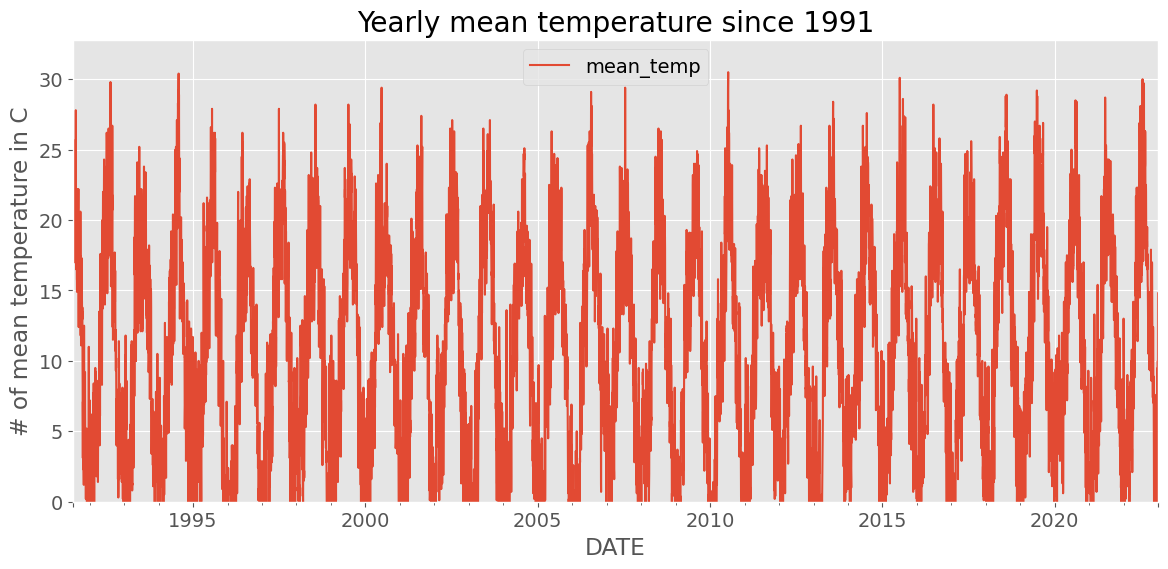

In [11]:
plot_meantemp(df)

### Model the trend

In [12]:
# Create a monthly column for the trend
df['year'] = df.index.year
df.head()

C:\Users\helge\AppData\Local\Temp\ipykernel_42812\2314793359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


,mean_temp,year
DATE,,
1991-07-09,23.4,1991
1991-07-10,19.6,1991
1991-07-11,24.8,1991
1991-07-12,25.7,1991
1991-07-13,21.9,1991


In [13]:
# Create a timestep variable
df['timestep'] = list(range(len(df)))
df.head()

C:\Users\helge\AppData\Local\Temp\ipykernel_42812\2799109993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestep'] = list(range(len(df)))


,mean_temp,year,timestep
DATE,,,
1991-07-09,23.4,1991,0
1991-07-10,19.6,1991,1
1991-07-11,24.8,1991,2
1991-07-12,25.7,1991,3
1991-07-13,21.9,1991,4


In [14]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']]
y = df.mean_temp
m.fit(X, y)

LinearRegression()

### Plot the trend and the original data

In [15]:
# Use the model to make a prediction
df['trend'] = m.predict(X)
df.head(15)

C:\Users\helge\AppData\Local\Temp\ipykernel_42812\1992350723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trend'] = m.predict(X)


,mean_temp,year,timestep,trend
DATE,,,,
1991-07-09,23.4,1991,0,9.681320
1991-07-10,19.6,1991,1,9.681461
1991-07-11,24.8,1991,2,9.681603
1991-07-12,25.7,1991,3,9.681745
1991-07-13,21.9,1991,4,9.681887
1991-07-14,18.6,1991,5,9.682028
1991-07-15,19.4,1991,6,9.682170
1991-07-16,18.1,1991,7,9.682312
1991-07-17,17.9,1991,8,9.682454


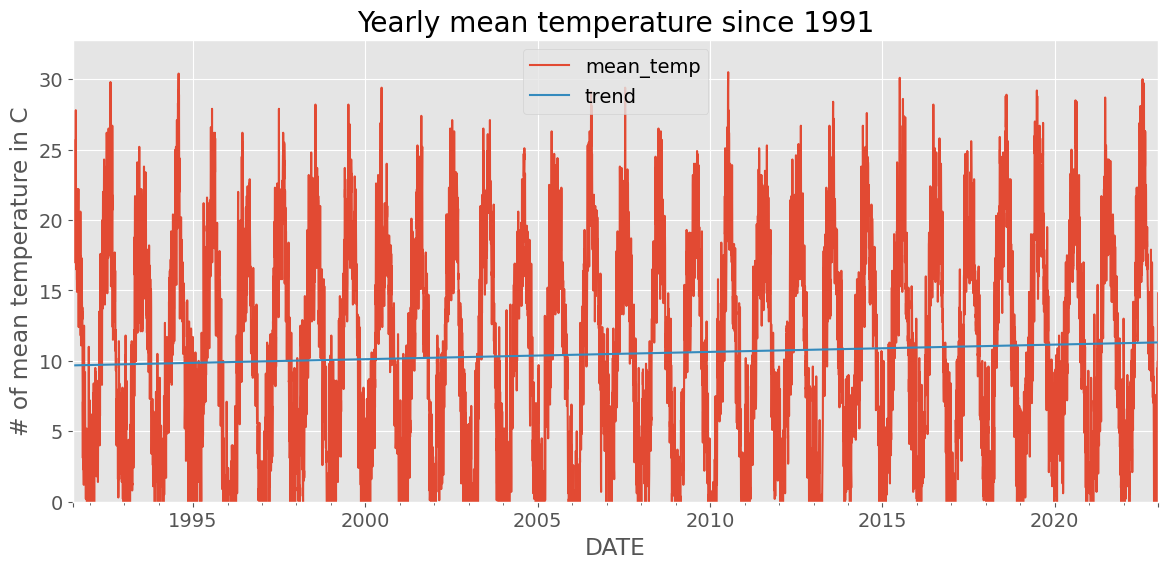

In [16]:
plot_meantemp(df[['mean_temp', 'trend']])

In [17]:
import plotly.express as px
px.scatter(df[['mean_temp','trend']])

In [18]:
m.intercept_,m.coef_

(9.681319567296967, array([0.00014176]))

### Model the seasonality

In [19]:
pd.get_dummies(df.year,prefix='year')

,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,...,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022
DATE,,,,,,,,,,,,,,,,,,,,,
1991-07-09,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991-07-10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991-07-11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991-07-12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1991-07-13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2022-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df.year,prefix='year')
# sklearn.preprocessing.OneHotEncoder

df = df.join(seasonal_dummies)

In [21]:
# Define X and y
X = df.drop(columns=['mean_temp', 'year', 'trend'])

In [22]:
m.fit(X, y)

LinearRegression()

In [23]:
# Create a model with trend and seasonality
df['trend_seasonal'] = m.predict(X)
df.head()

,mean_temp,year,timestep,trend,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,...,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,trend_seasonal
DATE,,,,,,,,,,,,,,,,,,,,,
1991-07-09,23.4,1991,0,9.681320,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.599801
1991-07-10,19.6,1991,1,9.681461,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.612115
1991-07-11,24.8,1991,2,9.681603,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.624429
1991-07-12,25.7,1991,3,9.681745,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.636743
1991-07-13,21.9,1991,4,9.681887,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.649057


### Plot the original data and the trend

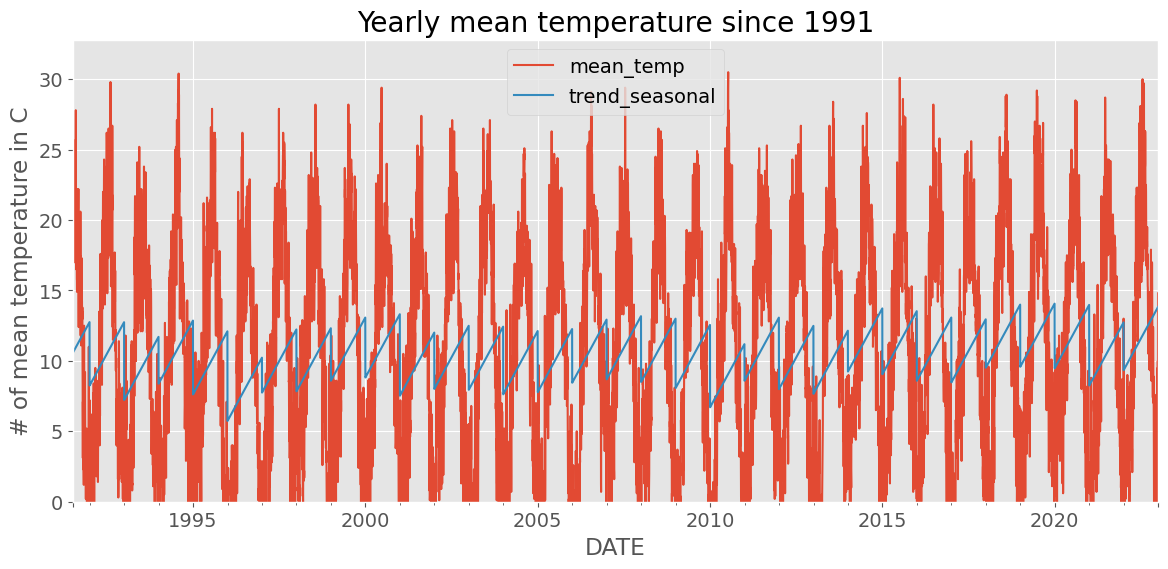

In [24]:
plot_meantemp(df[['mean_temp', 'trend_seasonal']])

### Extract the remainder

In [25]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
df['remainder'] = df.mean_temp - df.trend_seasonal

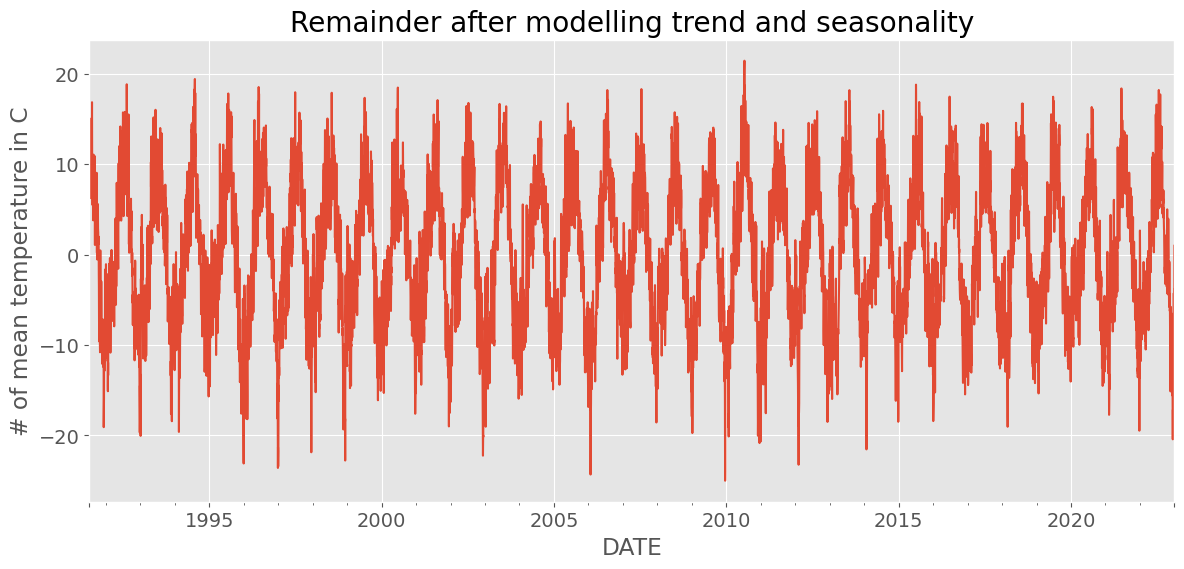

In [26]:
plot_meantemp(df['remainder'], title='Remainder after modelling trend and seasonality', ylim=False)

In [27]:
df['remainder'].mean(), df.remainder.std()

(7.669817279572374e-15, 7.715645447151185)

In [28]:
random_array = np.random.normal(loc=0, scale=10, size=11499)
df['random'] = random_array

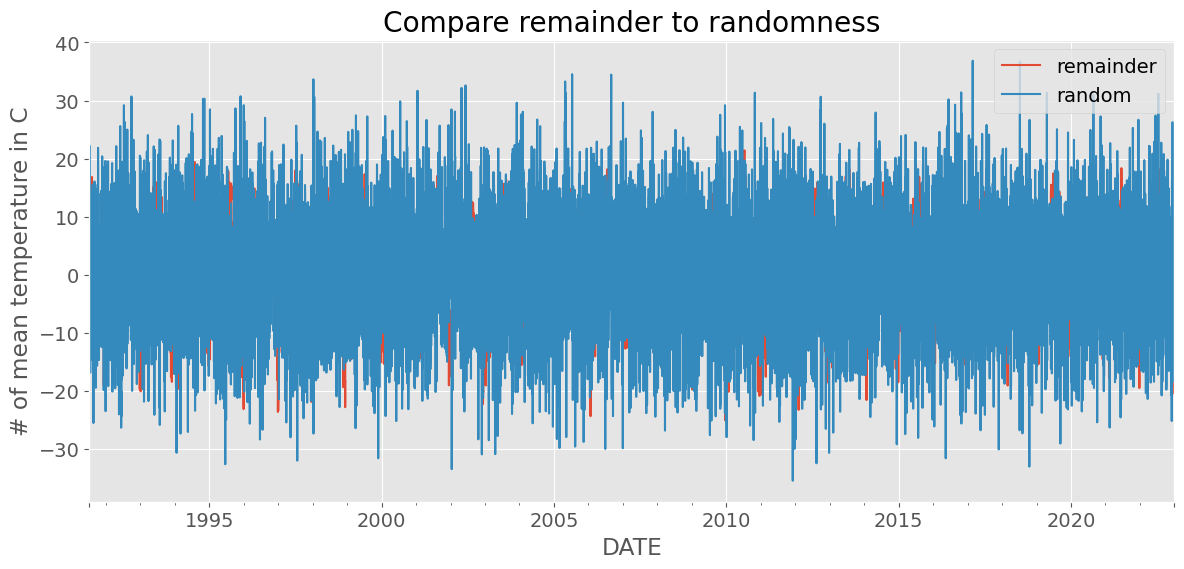

In [29]:
plot_meantemp(df[['remainder', 'random']], title='Compare remainder to randomness', ylim=False)

In [30]:
df['remainder'].to_csv('temperature_remainder_1991_years.csv')

In [31]:
df_rem = pd.read_csv('temperature_remainder_1991_years.csv', index_col=0, parse_dates=True)
df_rem.head()

,remainder
DATE,
1991-07-09,12.800199
1991-07-10,8.987885
1991-07-11,14.175571
1991-07-12,15.063257
1991-07-13,11.250943


In [32]:
# Plot the data
def plot_remainder(df_rem, title='Remaining Temperature after Extracting Trend and Seasonality'):
    df_rem.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    plt.show()

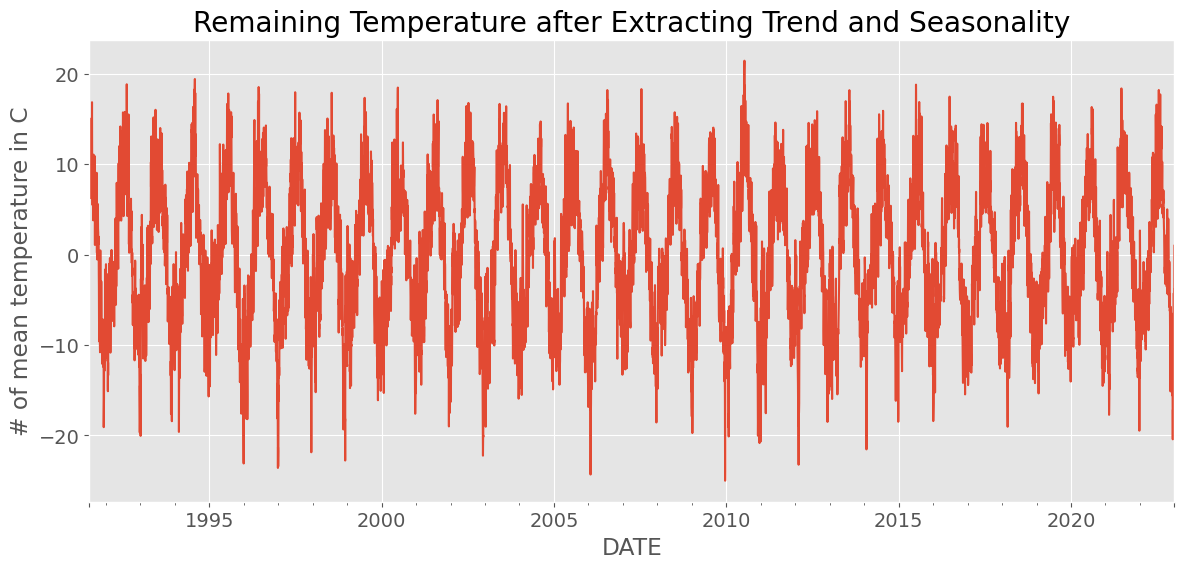

In [33]:
plot_remainder(df_rem['remainder'])

### Create a time-lagged input feature: lag1

In [34]:
df_rem

,remainder
DATE,
1991-07-09,12.800199
1991-07-10,8.987885
1991-07-11,14.175571
1991-07-12,15.063257
1991-07-13,11.250943
...,...
2022-12-27,-9.576270
2022-12-28,-7.488584
2022-12-29,-3.800898


In [35]:
df_rem['lag1'] = df_rem['remainder'].shift(1)

df_rem

,remainder,lag1
DATE,,
1991-07-09,12.800199,NaN
1991-07-10,8.987885,12.800199
1991-07-11,14.175571,8.987885
1991-07-12,15.063257,14.175571
1991-07-13,11.250943,15.063257
...,...,...
2022-12-27,-9.576270,-4.263956
2022-12-28,-7.488584,-9.576270
2022-12-29,-3.800898,-7.488584


In [36]:
df_rem.corr()

,remainder,lag1
remainder,1.000000,0.953854
lag1,0.953854,1.000000


### Plot remainder against lag1

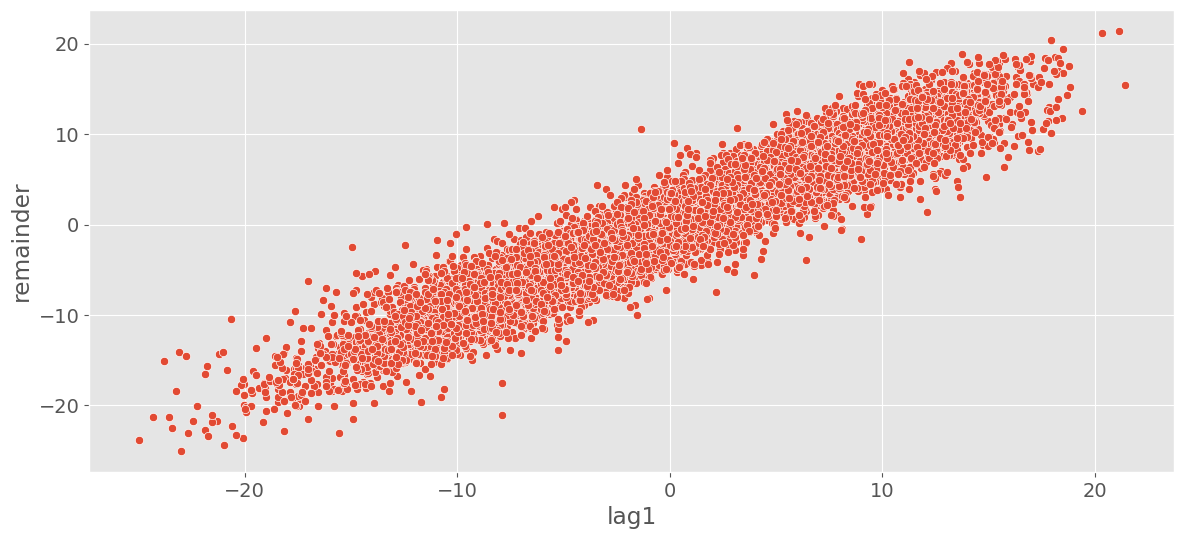

In [37]:
sns.scatterplot(x='lag1', y='remainder', data=df_rem);

### Run an Autoregression (Linear Regression) of lag1 on the remainder

In [38]:
# Drop missing values
df_rem.dropna(inplace=True)
df_rem.head()

,remainder,lag1
DATE,,
1991-07-10,8.987885,12.800199
1991-07-11,14.175571,8.987885
1991-07-12,15.063257,14.175571
1991-07-13,11.250943,15.063257
1991-07-14,7.938630,11.250943


In [39]:
# Assign X and y
X = df_rem[['lag1']]
y = df_rem['remainder']

In [40]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [41]:
# Create predictions
df_rem['predictions_ar1'] = m.predict(X)
df_rem.head()

,remainder,lag1,predictions_ar1
DATE,,,
1991-07-10,8.987885,12.800199,12.207038
1991-07-11,14.175571,8.987885,8.571079
1991-07-12,15.063257,14.175571,13.518786
1991-07-13,11.250943,15.063257,14.365408
1991-07-14,7.938630,11.250943,10.729450


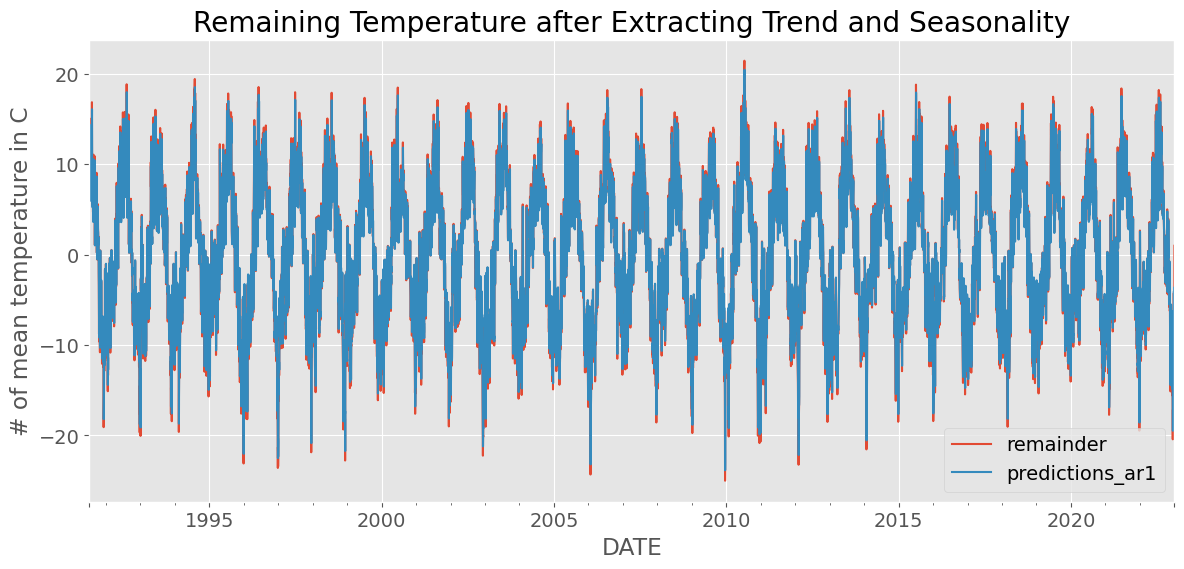

In [42]:
# Plot the original remainder and the prediction
plot_remainder(df_rem[['remainder', 'predictions_ar1']])

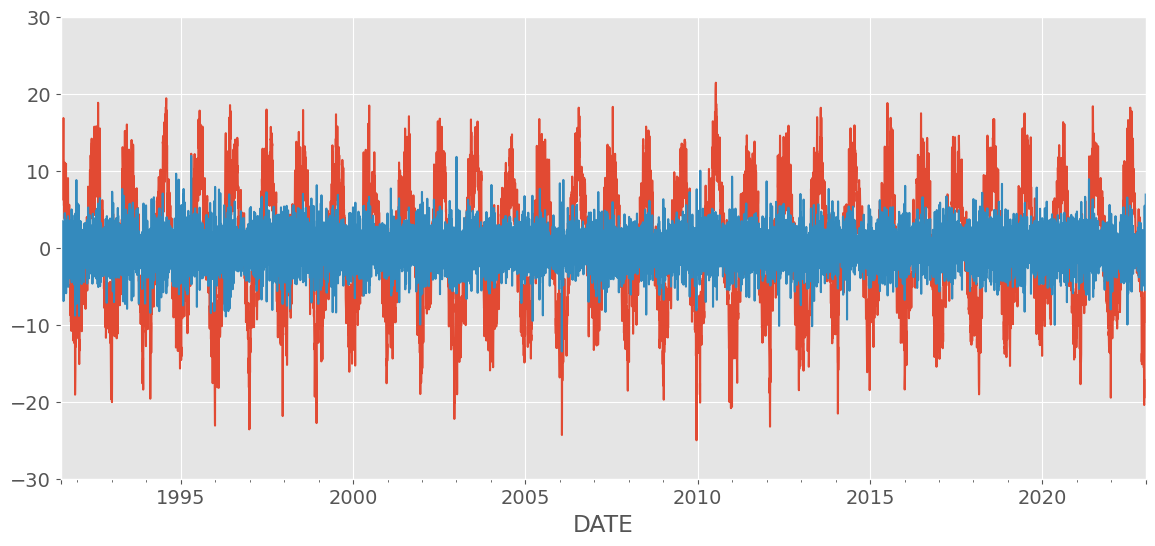

In [43]:
# Is the remainder prediction error smaller than the remainder itself?
df_rem['remainder'].plot(ylim=[-30,30])
(df_rem['remainder'] - df_rem['predictions_ar1']).plot(ylim=[-30,30]);

### Should we add another lag (lag2)?

In [44]:
df_rem['lag2'] = df_rem['remainder'].shift(2)
df_rem['lag3'] = df_rem['remainder'].shift(3)

df_rem.head()

,remainder,lag1,predictions_ar1,lag2,lag3
DATE,,,,,
1991-07-10,8.987885,12.800199,12.207038,NaN,NaN
1991-07-11,14.175571,8.987885,8.571079,NaN,NaN
1991-07-12,15.063257,14.175571,13.518786,8.987885,NaN
1991-07-13,11.250943,15.063257,14.365408,14.175571,8.987885
1991-07-14,7.938630,11.250943,10.729450,15.063257,14.175571


In [45]:
round(df_rem[['remainder', 'lag1', 'lag2','lag3']].corr(), 2)

,remainder,lag1,lag2,lag3
remainder,1.00,0.95,0.90,0.87
lag1,0.95,1.00,0.95,0.90
lag2,0.90,0.95,1.00,0.95
lag3,0.87,0.90,0.95,1.00


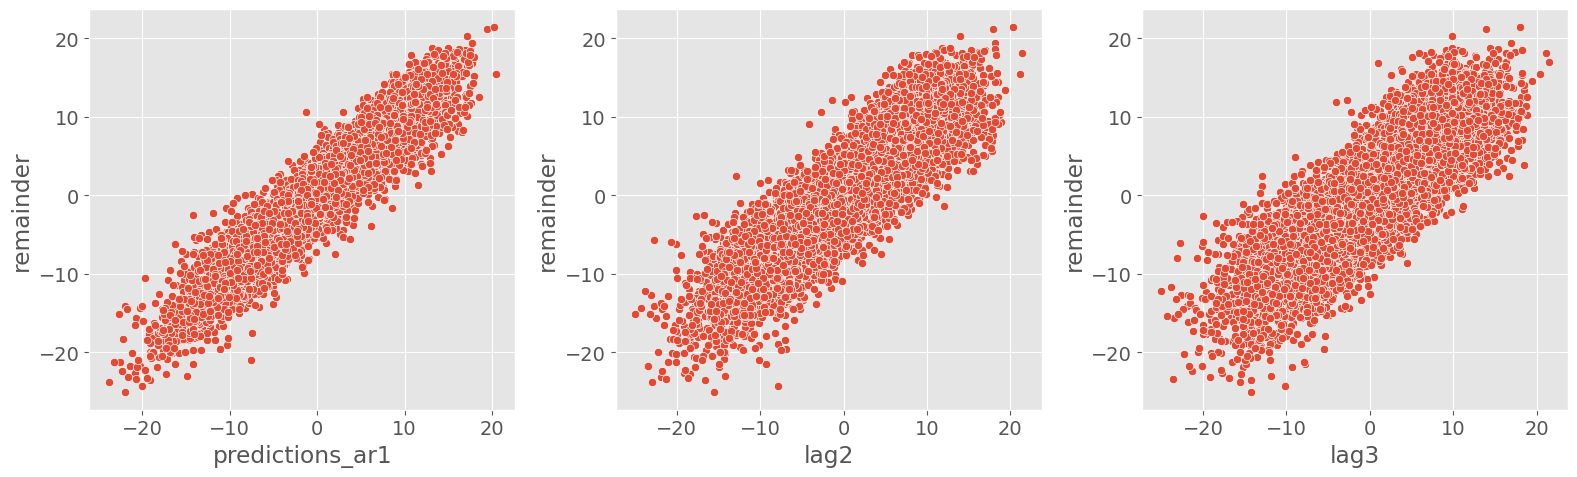

In [46]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style
p=3
lag_columns = df_rem.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df_rem[lag_columns[i]],y=df_rem['remainder'],ax=axes[i])
    
plt.tight_layout()

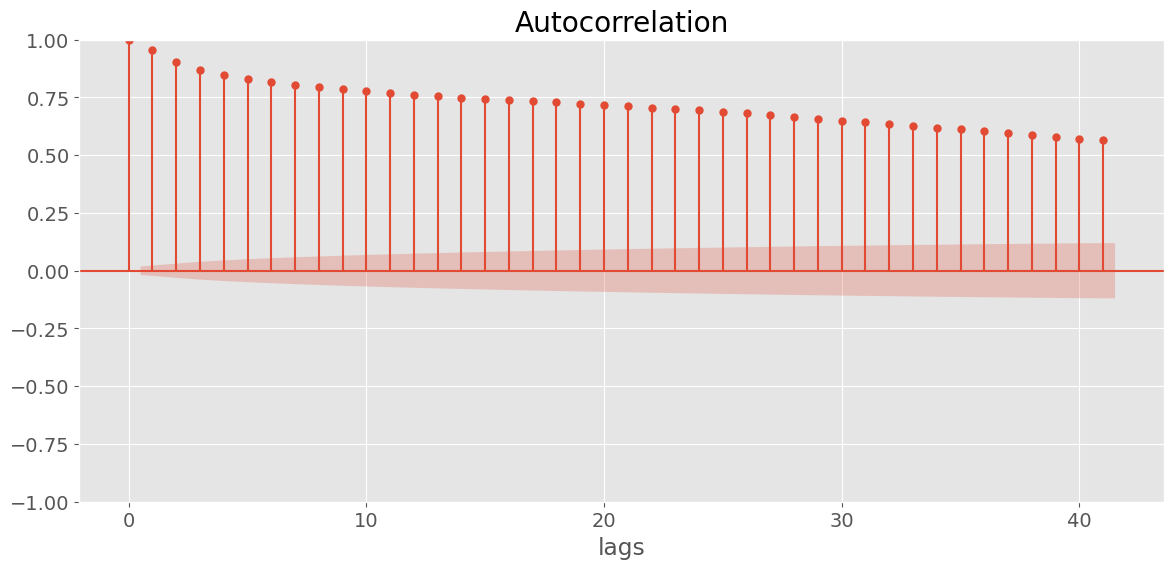

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_rem['remainder'])
plt.xlabel('lags');

In [48]:
# white noise or random noise
import numpy as np
random_array = np.random.normal(loc=0, scale=10, size=11498)
df_rem['random'] = random_array

<AxesSubplot: xlabel='DATE'>

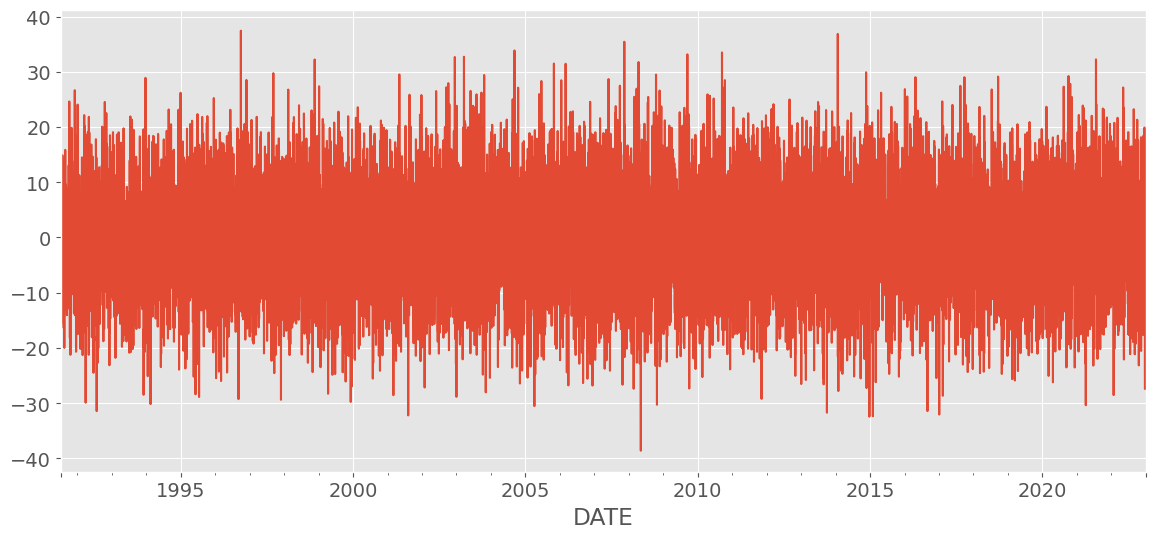

In [49]:
df_rem['random'].plot()

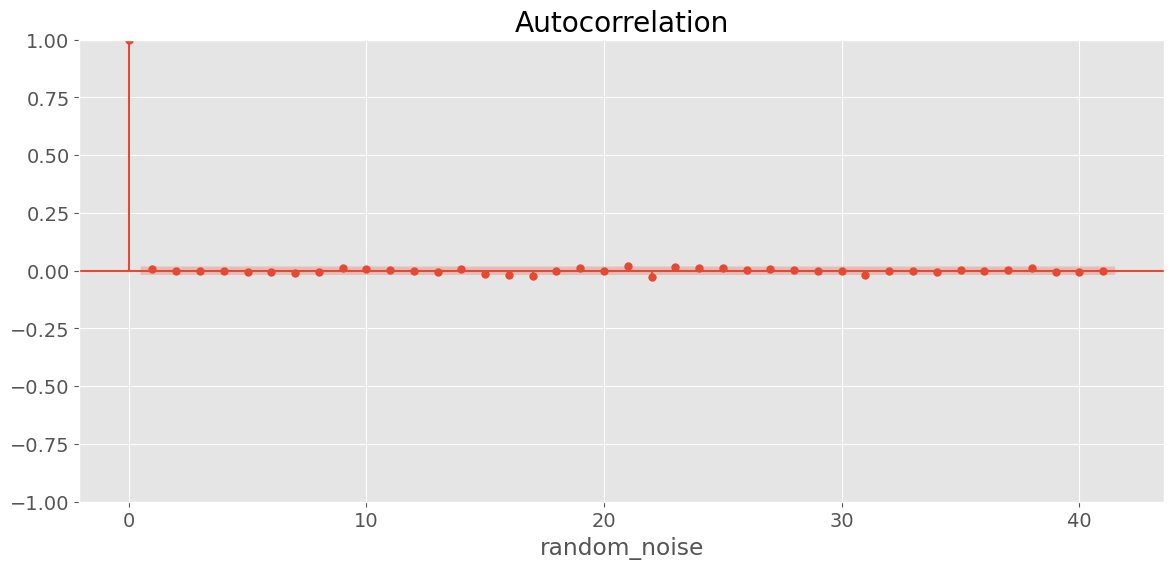

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_rem['random'])
plt.xlabel('random_noise');

### Determine _Partial_ Autocorrelation

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



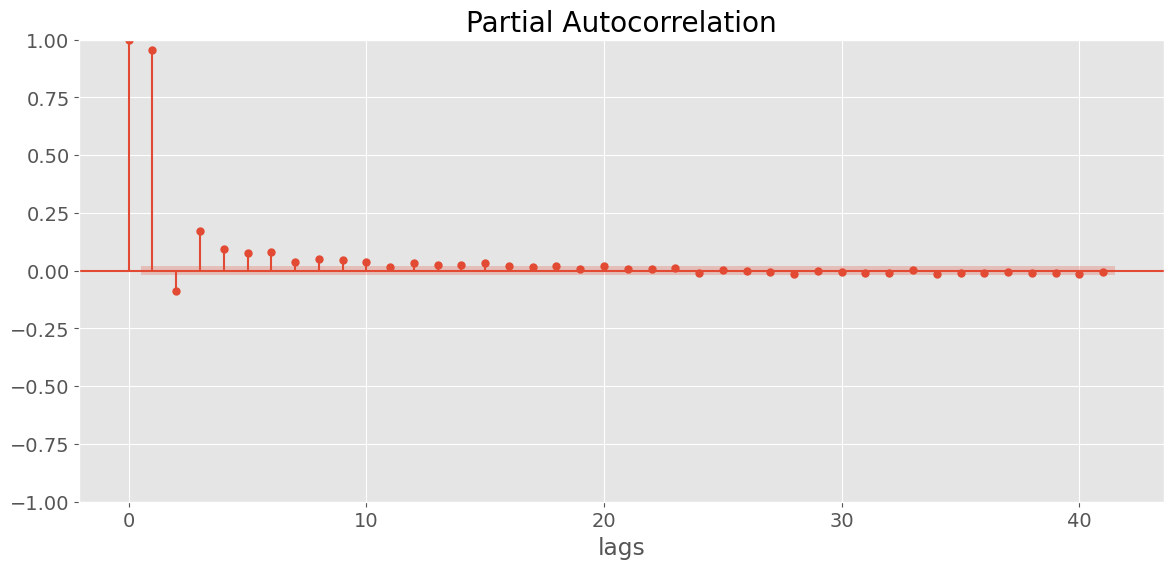

In [51]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_rem['remainder'])
plt.xlabel('lags');

In [52]:
from statsmodels.tsa.ar_model import ar_select_order
lags_order = ar_select_order(df_rem['remainder'], maxlag=5)

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [53]:
lags_order.ar_lags

[1, 2, 3, 4, 5]

In [54]:
lags_order.bic

{(1, 2, 3, 4, 5): 51386.225977549235,
 (1, 2, 3, 4): 51443.59052146843,
 (1, 2, 3): 51533.93403094021,
 (1, 2): 51863.43077096948,
 (1,): 51937.509035966716,
 0: 79581.72612285944}

### OLS Regression

#### on Xtrain_tran

In [ ]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain_tran.columns

In [ ]:
feature_list

In [ ]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

In [ ]:
while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain_tran[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
#         print(result.summary())
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

In [ ]:
result.summary()